📊 Zomato Restaurants Analysis
📌 Project Description

This project analyzes the Zomato dataset to uncover insights about restaurant trends,
ratings, costs, and customer preferences. It includes data cleaning,
exploratory data analysis (EDA), visualizations

Zomato data analysis project-
# Step 1-Importing Libraries

In [ ]:
pandas is used for data manipulation and analysis.
numpy is used for numerical opreations.
matplotlib.pyplot and seaborn are used for data visualization.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Step 2 -Create the dataframe

In [5]:
df = pd.read_csv('Zomato data .csv')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [6]:
# Basic cleaning
df.columns = df.columns.str.strip()   # remove spaces from column names
df.drop_duplicates(inplace=True)      # remove duplicates


# covert the data type of column-Rate 


In [13]:

def handle_rate(value):
    if pd.isna(value):
        return None
    return float(str(value).split('/')[0])

df['rate'] = df['rate'].apply(handle_rate)
print(df.head(10))

                                              name online_order book_table  \
0                                            Jalsa          Yes        Yes   
1                                   Spice Elephant          Yes         No   
2                                  San Churro Cafe          Yes         No   
3                            Addhuri Udupi Bhojana           No         No   
4                                    Grand Village           No         No   
5                                  Timepass Dinner          Yes         No   
6  Rosewood International Hotel - Bar & Restaurant           No         No   
7                                           Onesta          Yes        Yes   
8                                   Penthouse Cafe          Yes         No   
9                                        Smacznego          Yes         No   

   rate  votes  approx_cost(for two people) listed_in(type)  
0   4.1    775                          800          Buffet  
1   4.1    787   

In [14]:
df.info # checking null values
# there is no null values in this dataset

<bound method DataFrame.info of                       name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2         

Type of Resturant 

C:\Users\Rishi Yadav\AppData\Local\Temp\ipykernel_6624\2255085440.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['listed_in(type)'],palette='Set2')


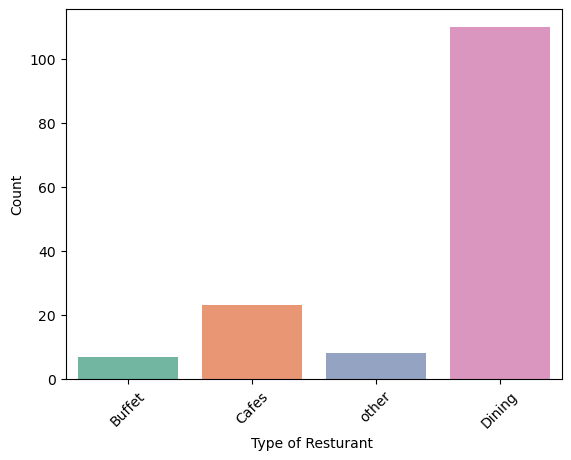

In [15]:

sns.countplot(x=df['listed_in(type)'],palette='Set2')
plt.xlabel("Type of Resturant ")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Conclusion - majority of the resturant falls in dinning category

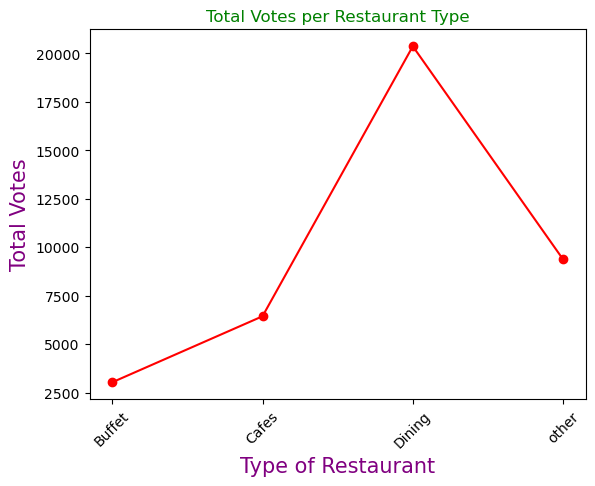

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Group votes by restaurant type
grouped_data = df.groupby('listed_in(type)')['votes'].sum()

# Convert to DataFrame and reset index
result = pd.DataFrame({'votes': grouped_data}).reset_index()

# Plot
plt.plot(result['listed_in(type)'], result['votes'], color='r', marker='o')
plt.xlabel("Type of Restaurant",color='purple',size=15)
plt.ylabel("Total Votes",color='purple',size=15)
plt.title("Total Votes per Restaurant Type" ,color='g')
plt.xticks(rotation=45)  # rotate labels if needed
plt.show()


#conclusion- dining resturants has recieved maximum votes
# so we can focous on resturant ambiance

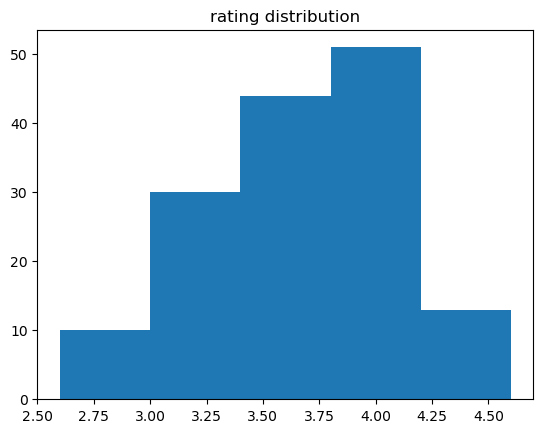

In [17]:
plt.hist(df['rate'],bins= 5)
plt.title('rating distribution')
plt.show()


conclusion- the majority resturantsreceived ratings from 3.5 to 4

Average order spending by couples

In [120]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


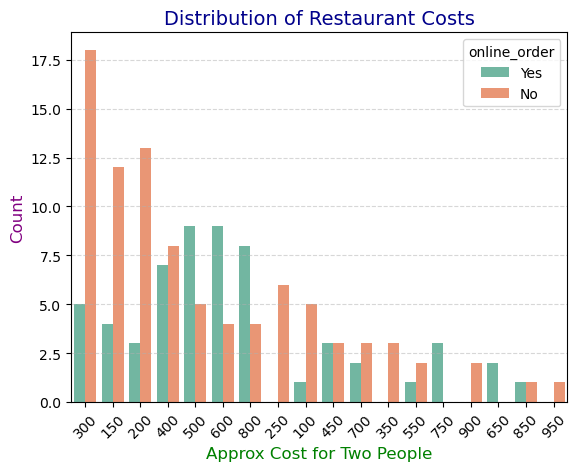

In [18]:
couple_data= df['approx_cost(for two people)']	
sns.countplot(x=couple_data,palette="Set2",  hue='online_order', data=df,order=couple_data.value_counts().index)

plt.title("Distribution of Restaurant Costs", fontsize=14, color='darkblue')
plt.xlabel("Approx Cost for Two People", fontsize=12, color='green')
plt.ylabel("Count", fontsize=12, color='purple')
plt.xticks(rotation=45, fontsize=10)  # rotate x labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.5)  # add gridlines

plt.show()

conclusion- the majority of couples preferr resturants with an approximate cost of 300 rupees

which mode receives maximum rating

C:\Users\Rishi Yadav\AppData\Local\Temp\ipykernel_6624\1991692114.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='online_order' , y= 'rate' ,data=df,palette='Set2')


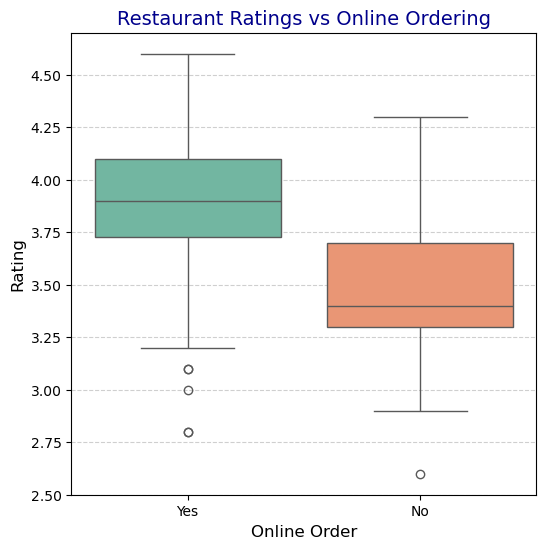

In [19]:
df.head()
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order' , y= 'rate' ,data=df,palette='Set2')
plt.title("Restaurant Ratings vs Online Ordering", fontsize=14, color='darkblue')
plt.xlabel("Online Order", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)  # adds gridlines for clarity

conclusion - offline order received lower rating in comparision to online order

In [146]:
df.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


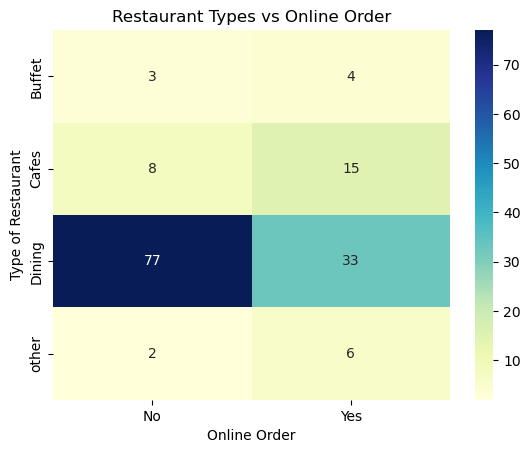

In [20]:
pivot_table = df.pivot_table(
    index='listed_in(type)',
    columns='online_order',
    aggfunc='size',
    fill_value=0
)

# Heatmap
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')

plt.title("Restaurant Types vs Online Order")
plt.xlabel("Online Order")
plt.ylabel("Type of Restaurant")
plt.show()

conclusion:Dining resturants primarily accept offline orders, wheras 
cafes primarily receive online orders. this suggests that client prefers
order in person at restaurants, but prefer online ordering at cafes.